<center><h3> Student Performance in Exams </h3>

<img src='https://student.unsw.edu.au/sites/all/files/styles/inline_image/public/page_image/unsw-exam-preparation-tips.gif' height=100, width=100>
<br>
<a href='https://www.kaggle.com/spscientist/students-performance-in-exams'> <button style='background-color: black; color: white;'>Click Here for the Dataset </button> </a> <p> Background: Includes scores on tests for a couple college students</p>


</center>


**A. Data Loading and Preparation**

Importing libraries

In [1]:
library(ggplot2)
library(dplyr)
#install.packages('randomForest')
library('randomForest')

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



Reading in file

In [2]:
df<-read.csv('StudentsPerformance.csv', stringsAsFactors = FALSE)

Finding out how many rows and columns there are in the dataset

In [3]:
nrow(df)
ncol(df)

[1] 1000

[1] 8

* There are 1000 rows and 8 columns

First 6 rows of data

In [4]:
head(df)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


Column data types

In [5]:
sapply(df, class)

gender              race.ethnicity 
                "character"                 "character" 
parental.level.of.education                       lunch 
                "character"                 "character" 
    test.preparation.course                  math.score 
                "character"                   "integer" 
              reading.score               writing.score 
                  "integer"                   "integer"

Checking nulls in data

In [6]:
sapply(df, function(x) sum(is.na(x)))

gender              race.ethnicity 
                          0                           0 
parental.level.of.education                       lunch 
                          0                           0 
    test.preparation.course                  math.score 
                          0                           0 
              reading.score               writing.score 
                          0                           0

* There are no nulls in the dataset

Summary Statistics

In [7]:
summary(df)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   :  0.00   Min.   : 17.00  
 Class :character   Class :character        1st Qu.: 57.00   1st Qu.: 59.00  
 Mode  :character   Mode  :character        Median : 66.00   Median : 70.00  
                                            Mean   : 66.09   Mean   : 69.17  
                                            3rd Qu.: 77.00   3rd Qu.: 79.00  
                                            Max.   :100.00   Ma

* From the summary statistics above we can see that the max for reading, math, and writing scores was 100.  The minimum for math was 0, 17 for reading, and 10 for writing.  

<hr>

**B. Exploratory Data Analysis (EDA)**

Now let's look more in depth into the columns and the values in them

##### *Univariate Analysis*

 **I. Gender**

In [8]:
gender<-as.data.frame(table('Gender'=df$gender))
gender$Percentage<-(gender$Freq/sum(gender$Freq))*100
gender$Percentage<- paste(as.character(gender$Percentage), '%', '')
gender

Gender,Freq,Percentage
female,518,51.8 %
male,482,48.2 %


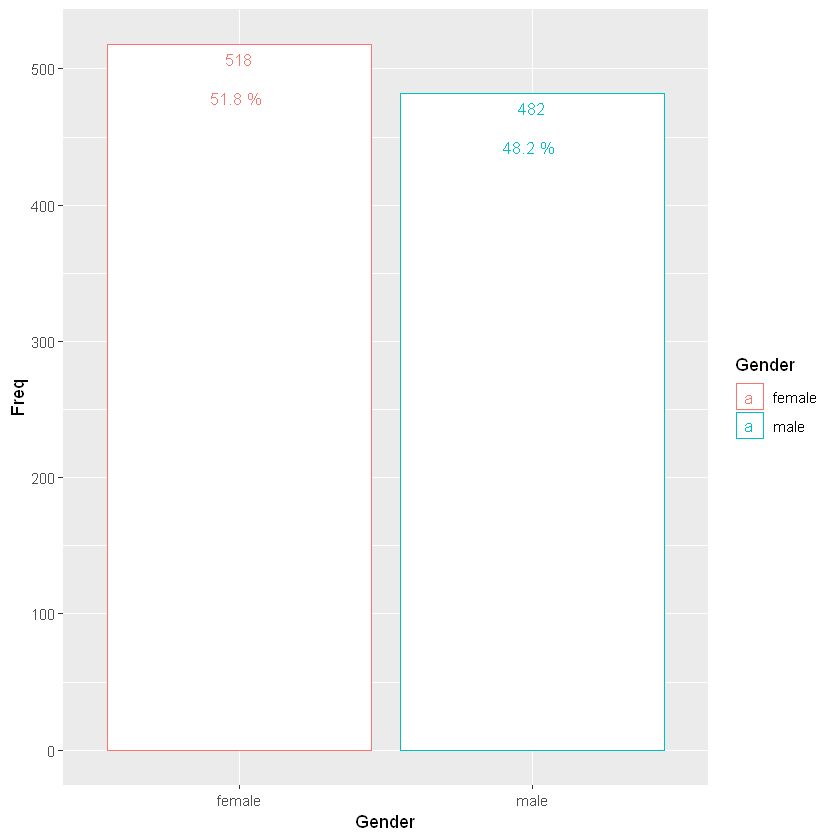

In [9]:
p<-ggplot(data=gender, aes(x=Gender, y=Freq, color=Gender)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=Freq), vjust=1.6,position = position_dodge(0.9), size=3.5)+
geom_text(aes(label=Percentage), vjust=4.6, position = position_dodge(0.9), size=3.5)
p

<div class="alert alert-success">

**Sub-Section I Conclusion**
* There are more females (51.8%) than men (48.2%) in this dataset. 

</div>

<hr>

<strong>II. Test scores </strong>

* Getting the average scores

In [10]:
avread<-mean(df$reading.score,trim = 0, na.rm = FALSE)
avread

[1] 69.169

In [11]:
avwriting<-mean(df$writing.score,trim = 0, na.rm = FALSE)
avwriting

[1] 68.054

In [12]:
avmath<-mean(df$math.score,trim = 0, na.rm = FALSE)
avmath

[1] 66.089

<div class="alert alert-success">

**Sub-Section II Conclusion**
* On average in this dataset it seems that students performed the best in the reading section followed by writing and math.
* All three test types had the max score of 100 (summary statistics above).  
* In all categories of tests the average performed above 50%
* The minimum for math was 0, 17 for reading, and 10 for writing (summary statistics above).
</div>


<hr>

**III. Parental Level of Education**

In [13]:
parented<-as.data.frame(table('Parental Education'=df$parental.level.of.education))
parented<-parented[order(parented$Freq, decreasing=TRUE),]
rownames(parented)<-1:nrow(parented)
parented$Percentage<-(parented$Freq/sum(parented$Freq))*100
parented$Percentage<- paste(as.character(parented$Percentage), '%', '')
parented

Parental.Education,Freq,Percentage
some college,226,22.6 %
associate's degree,222,22.2 %
high school,196,19.6 %
some high school,179,17.9 %
bachelor's degree,118,11.8 %
master's degree,59,5.9 %


<div class="alert alert-success">

**Sub-Section III Conclusion**
* Most of the parents only completed some of college and associate degrees followed descending by high school, some high school, bachelor's degree and master's degree. 

</div>

<hr>

**IV. Race Group Frequencies**

In [14]:
print("Race Group Frequencies")
raceeth<-as.data.frame(table('Ethnicity'=df$race.ethnicity))
raceeth<- raceeth[order(raceeth$Freq, decreasing=TRUE),]
rownames(raceeth)<-1:nrow(raceeth)
raceeth$Percentage<-(raceeth$Freq/sum(raceeth$Freq))*100
raceeth$Percentage<- paste(as.character(raceeth$Percentage), '%', '')
raceeth

[1] "Race Group Frequencies"


Ethnicity,Freq,Percentage
group C,319,31.9 %
group D,262,26.2 %
group B,190,19 %
group E,140,14 %
group A,89,8.9 %


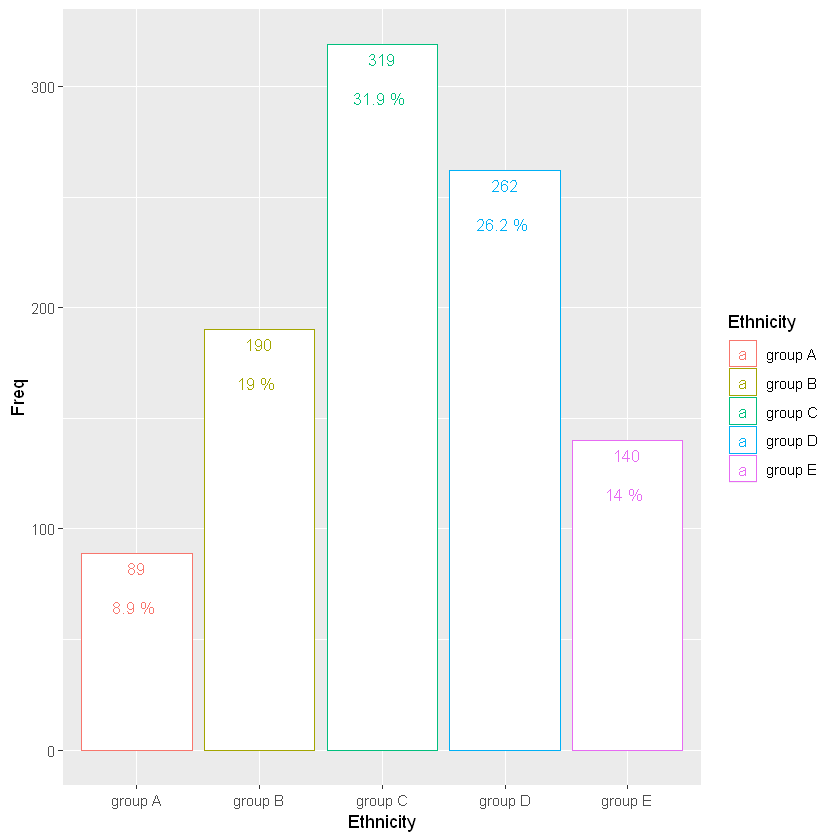

In [15]:
p<-ggplot(data=raceeth, aes(x=Ethnicity, y=Freq, color=Ethnicity)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=Freq), vjust=1.6,position = position_dodge(0.9), size=3.5)+
geom_text(aes(label=Percentage), vjust=4.6, position = position_dodge(0.9), size=3.5)
p

<div class="alert alert-success">

**Sub-Section IV Conclusion**
* The most people falled under Group C (31.9%)followed by D (26.2%), B (19%), E (14%), and A (8.9%)

</div>

<hr>

**V. Did Students do Test Prep. Beforehand?**

In [16]:
print("Test Prep")
testprep<-as.data.frame(table('Test Prep Completed'=df$test.preparation.course))
testprep$Percentage<-(testprep$Freq/sum(testprep$Freq))*100
testprep<-testprep[order(testprep$Freq, decreasing=TRUE),]
rownames(testprep)<-1:nrow(testprep)
testprep$Percentage<-format(round(testprep$Percentage, 2), nsmall = 2)
testprep$Percentage<- paste(as.character(testprep$Percentage), '%', '')
testprep

[1] "Test Prep"


Test.Prep.Completed,Freq,Percentage
none,642,64.20 %
completed,358,35.80 %


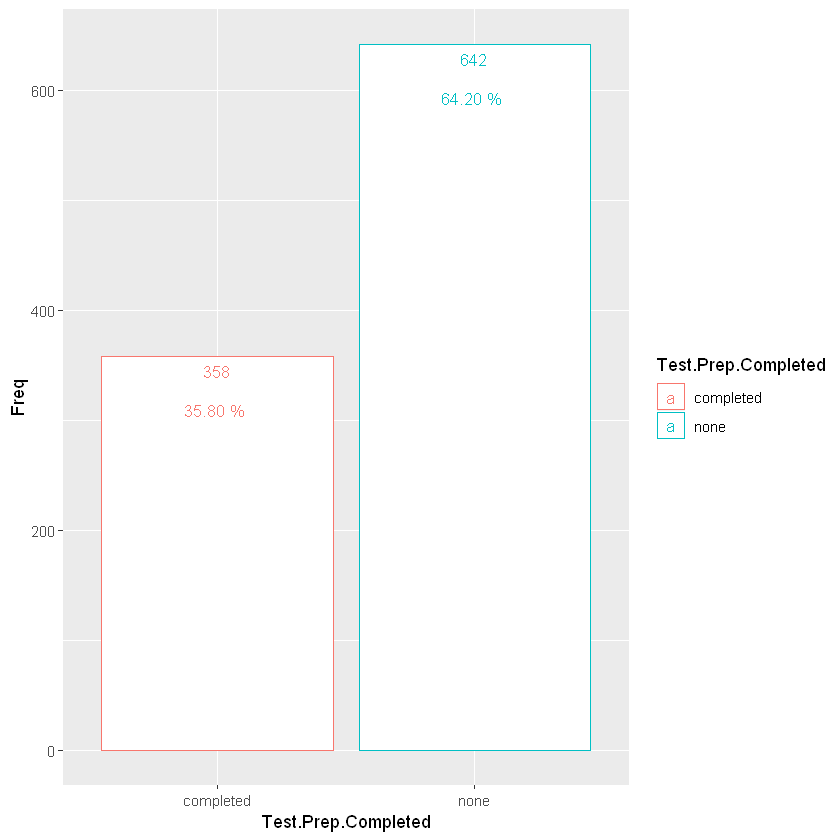

In [17]:
p<-ggplot(data=testprep, aes(x=Test.Prep.Completed, y=Freq, color=Test.Prep.Completed)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=Freq), vjust=1.6,position = position_dodge(0.9), size=3.5)+
geom_text(aes(label=Percentage), vjust=4.6, position = position_dodge(0.9), size=3.5)
p

<div class="alert alert-success">

**Sub-Section V Conclusion**
* Significantly more students did no test prep (64.20%) than did test prep (35.80%). 

</div>

<hr>

**VI. Are more students on the standard lunch plan or free/reduced?**

In [18]:
lunch<-as.data.frame(table("Lunch Plan"=df$lunch))
lunch$Percentage<-(lunch$Freq/sum(lunch$Freq))*100
lunch$Percentage<-format(round(lunch$Percentage, 2), nsmall = 2)
lunch$Percentage<- paste(as.character(lunch$Percentage), '%', '')
lunch

Lunch.Plan,Freq,Percentage
free/reduced,355,35.50 %
standard,645,64.50 %


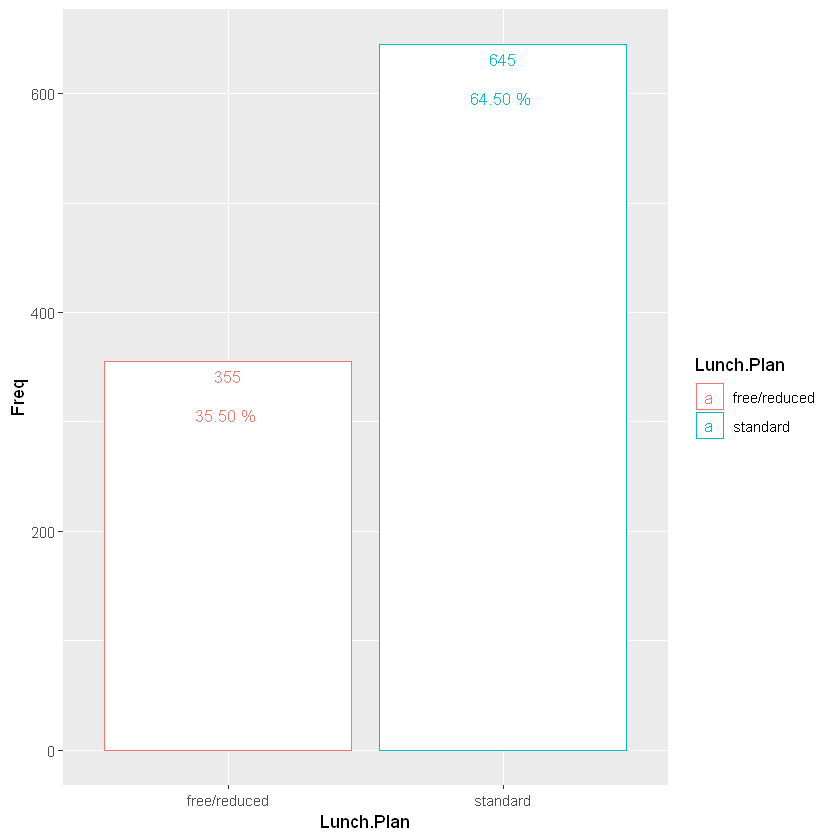

In [19]:
p<-ggplot(data=lunch, aes(x=Lunch.Plan, y=Freq, color=Lunch.Plan)) +geom_bar(stat="identity", fill="white")+
geom_text(aes(label=Freq), vjust=1.6,position = position_dodge(0.9), size=3.5)+
geom_text(aes(label=Percentage), vjust=4.6, position = position_dodge(0.9), size=3.5)
p

<div class="alert alert-success">

**Sub-Section VI Conclusion**
* More students in this dataset eat standard lunches (64.5%) rather than free or reduced lunches (35.5%).

</div>

#### *Multivariate Analysis*

**I. Comparing Race and Test Scores**

In [20]:
racescores<-df %>% group_by(race.ethnicity)
racescores<-racescores %>% summarise(
  Avg.Math.Race = mean(math.score),
  Avg.Reading.Race = mean(reading.score),
  Avg.Writing.Race = mean(writing.score)
)
racescores$Avg.Math.Race<-format(round(racescores$Avg.Math.Race, 2), nsmall = 2)
racescores$Avg.Reading.Race<-format(round(racescores$Avg.Reading.Race, 2), nsmall = 2)
racescores$Avg.Writing.Race<-format(round(racescores$Avg.Writing.Race, 2), nsmall = 2)
racescores$Avg.Math.Race<- paste(as.character(racescores$Avg.Math.Race), '%', '')
racescores$Avg.Reading.Race<- paste(as.character(racescores$Avg.Reading.Race), '%', '')
racescores$Avg.Writing.Race<- paste(as.character(racescores$Avg.Writing.Race), '%', '')
racescores

race.ethnicity,Avg.Math.Race,Avg.Reading.Race,Avg.Writing.Race
group A,61.63 %,64.67 %,62.67 %
group B,63.45 %,67.35 %,65.60 %
group C,64.46 %,69.10 %,67.83 %
group D,67.36 %,70.03 %,70.15 %
group E,73.82 %,73.03 %,71.41 %


* Group E had the highest average scores in all three categories.
* Group A had the lowest average scores in all three categories.

**II. Comparing Lunch Plans and Test Scores**

In [21]:
lunchscores<-df %>% group_by(lunch)
lunchscores<-lunchscores %>% summarise(
  Avg.Math.Lunch = mean(math.score),
  Avg.Reading.Lunch = mean(reading.score),
  Avg.Writing.Lunch = mean(writing.score)
)
lunchscores$Avg.Math.Lunch<-format(round(lunchscores$Avg.Math.Lunch, 2), nsmall = 2)
lunchscores$Avg.Reading.Lunch<-format(round(lunchscores$Avg.Reading.Lunch, 2), nsmall = 2)
lunchscores$Avg.Writing.Lunch<-format(round(lunchscores$Avg.Writing.Lunch, 2), nsmall = 2)
lunchscores$Avg.Math.Lunch<- paste(as.character(lunchscores$Avg.Math.Lunch), '%', '')
lunchscores$Avg.Reading.Lunch<- paste(as.character(lunchscores$Avg.Reading.Lunch), '%', '')
lunchscores$Avg.Writing.Lunch<- paste(as.character(lunchscores$Avg.Writing.Lunch), '%', '')
lunchscores

lunch,Avg.Math.Lunch,Avg.Reading.Lunch,Avg.Writing.Lunch
free/reduced,58.92 %,64.65 %,63.02 %
standard,70.03 %,71.65 %,70.82 %


* The average scores for writing, reading, and math were significantly better for students on the standard plan but that may also be because in this dataset there are more students overall getting standard lunches (64.5%) over free/reduced lunch plans (35.5%). 

**III. Comparing Whether a Student Prepared and Test Scores**

In [22]:
prepscores<-df %>% group_by(test.preparation.course)
prepscores<-prepscores %>% summarise(
  Avg.Math.Prep = mean(math.score),
  Avg.Reading.Prep = mean(reading.score),
  Avg.Writing.Prep = mean(writing.score)
)
prepscores$Avg.Math.Prep<-format(round(prepscores$Avg.Math.Prep, 2), nsmall = 2)
prepscores$Avg.Reading.Prep<-format(round(prepscores$Avg.Reading.Prep, 2), nsmall = 2)
prepscores$Avg.Writing.Prep<-format(round(prepscores$Avg.Writing.Prep, 2), nsmall = 2)
prepscores$Avg.Math.Prep<- paste(as.character(prepscores$Avg.Math.Prep), '%', '')
prepscores$Avg.Reading.Prep<- paste(as.character(prepscores$Avg.Reading.Prep), '%', '')
prepscores$Avg.Writing.Prep<- paste(as.character(prepscores$Avg.Writing.Prep), '%', '')
prepscores

test.preparation.course,Avg.Math.Prep,Avg.Reading.Prep,Avg.Writing.Prep
completed,69.70 %,73.89 %,74.42 %
none,64.08 %,66.53 %,64.50 %


**IV. Comparing the Level of Parental Education to Student Test Scores**

In [23]:
parentedscores<-df %>% group_by(parental.level.of.education)
parentedscores<-parentedscores %>% summarise(
  Avg.Math.ParentEd = mean(math.score),
  Avg.Reading.ParentEd = mean(reading.score),
  Avg.Writing.ParentEd = mean(writing.score)
)
parentedscores$Avg.Math.ParentEd<-format(round(parentedscores$Avg.Math.ParentEd, 2), nsmall = 2)
parentedscores$Avg.Reading.ParentEd<-format(round(parentedscores$Avg.Reading.ParentEd, 2), nsmall = 2)
parentedscores$Avg.Writing.ParentEd<-format(round(parentedscores$Avg.Writing.ParentEd, 2), nsmall = 2)
parentedscores$Avg.Math.ParentEd<- paste(as.character(parentedscores$Avg.Math.ParentEd), '%', '')
parentedscores$Avg.Reading.ParentEd<- paste(as.character(parentedscores$Avg.Reading.ParentEd), '%', '')
parentedscores$Avg.Writing.ParentEd<- paste(as.character(parentedscores$Avg.Writing.ParentEd), '%', '')
parentedscores

parental.level.of.education,Avg.Math.ParentEd,Avg.Reading.ParentEd,Avg.Writing.ParentEd
associate's degree,67.88 %,70.93 %,69.90 %
bachelor's degree,69.39 %,73.00 %,73.38 %
high school,62.14 %,64.70 %,62.45 %
master's degree,69.75 %,75.37 %,75.68 %
some college,67.13 %,69.46 %,68.84 %
some high school,63.50 %,66.94 %,64.89 %


In [24]:
genderscores<-df %>% group_by(gender)
genderscores<-genderscores %>% summarise(
  Avg.Math.Gender = mean(math.score),
  Avg.Reading.Gender = mean(reading.score),
  Avg.Writing.Gender = mean(writing.score)
)

genderscores$Avg.Math.Gender<-format(round(genderscores$Avg.Math.Gender, 2), nsmall = 2)
genderscores$Avg.Reading.Gender<-format(round(genderscores$Avg.Reading.Gender, 2), nsmall = 2)
genderscores$Avg.Writing.Gender<-format(round(genderscores$Avg.Writing.Gender, 2), nsmall = 2)
genderscores$Avg.Math.Gender<- paste(as.character(genderscores$Avg.Math.Gender), '%', '')
genderscores$Avg.Reading.Gender<- paste(as.character(genderscores$Avg.Reading.Gender), '%', '')
genderscores$Avg.Writing.Gender<- paste(as.character(genderscores$Avg.Writing.Gender), '%', '')
genderscores

gender,Avg.Math.Gender,Avg.Reading.Gender,Avg.Writing.Gender
female,63.63 %,72.61 %,72.47 %
male,68.73 %,65.47 %,63.31 %


* Females on average did better in reading (~72.6%) and writing (~72.5%) while men did better in math (~68.7% vs ~63.6%).  

<hr>

In [25]:
df=df %>% mutate_if(is.character, as.factor)

In [26]:
head(df)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


Random Forest

In [27]:
rf<-randomForest(formula=math.score~gender+race.ethnicity+parental.level.of.education+lunch+test.preparation.course, data=df)

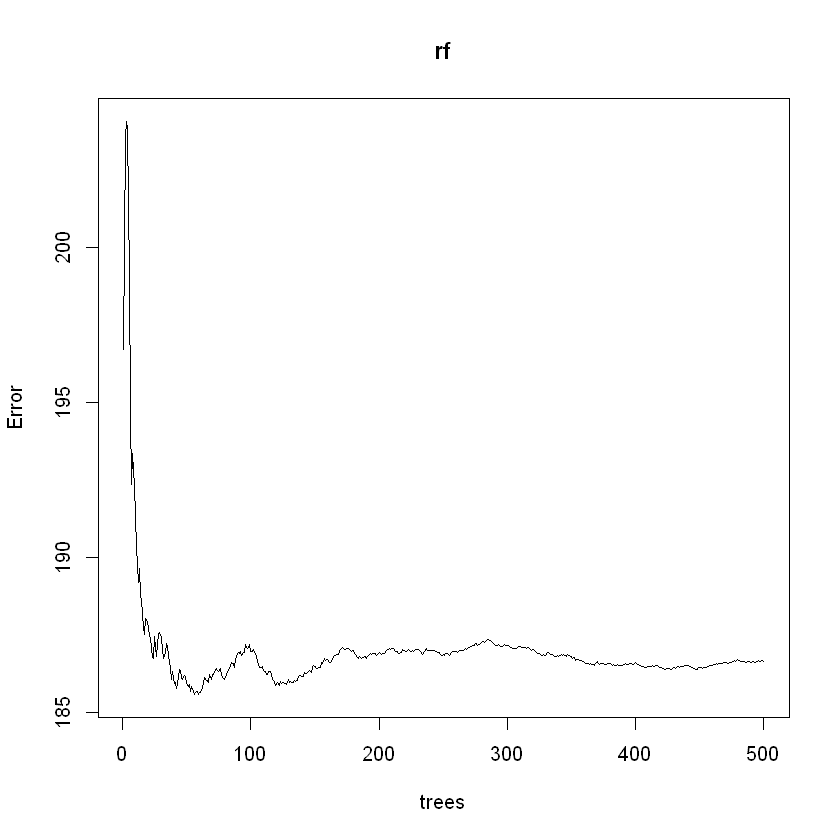

In [28]:
plot(rf)

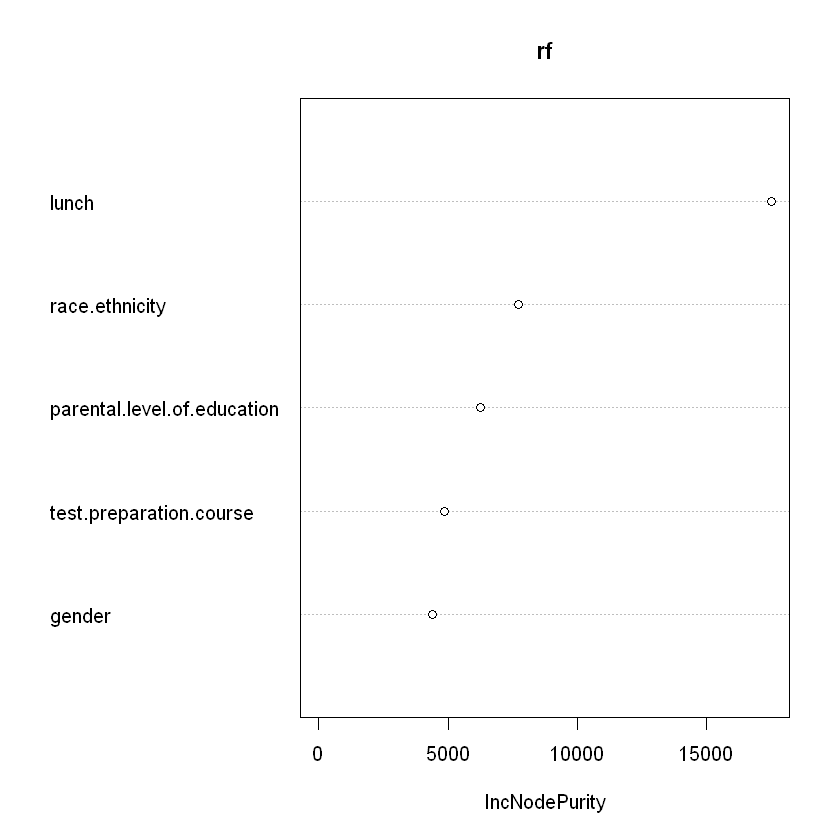

In [29]:
varImpPlot(rf)

The lunch plan seems the most important followed by race, parental level of education, test prep course, and gender for math scores.  

In [30]:
rfread<-randomForest(formula=reading.score~gender+race.ethnicity+parental.level.of.education+lunch+test.preparation.course, data=df)

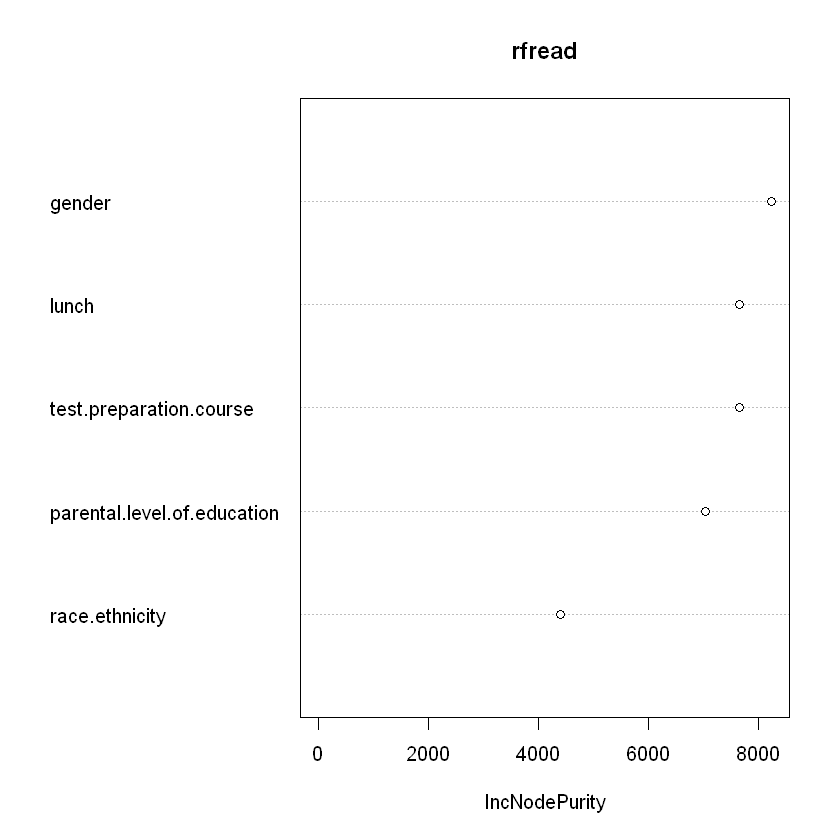

In [31]:
varImpPlot(rfread)

For the reading score, gender comes up the most significant followed by test prep course, lunch, parental levelof education, and ethnicity.

In [32]:
rfwrit<-randomForest(formula=writing.score~gender+race.ethnicity+parental.level.of.education+lunch+test.preparation.course, data=df)

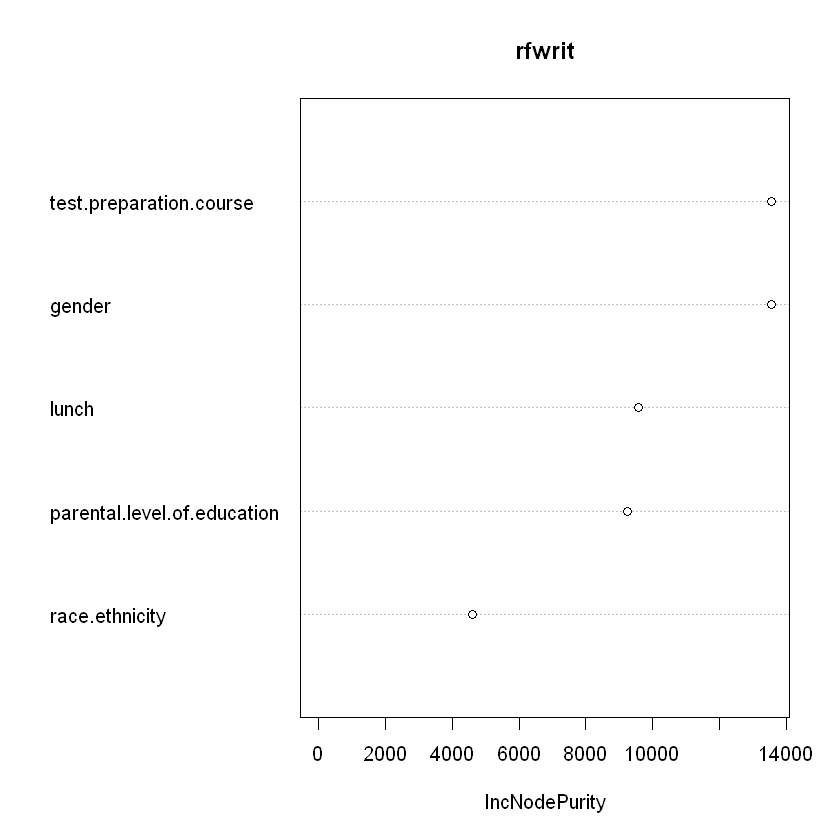

In [33]:
varImpPlot(rfwrit)

For the writing score, the test prep score comes up most significant followed by gender, lunch, parental level of education, and ethnicity